# Linear Regression with Numpy

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import zeros

## Step 1:  Load Data

Let's create a data set. 

In [203]:
X = np.arange(50)
y = 2 * X + 1 + np.random.randn(50)*8

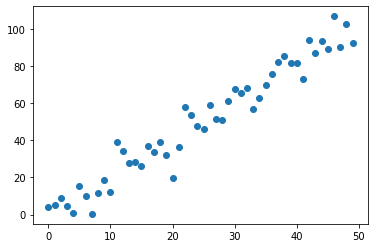

In [204]:
plt.scatter(X,y)
plt.show()

## Step 2: Build the model

In this case, it would be a linear regression.  So we are trying to have a line $$y = Wx + b$$. 

We use $W$, instead of $m$, because $W$ is more conventional letter in data science

We want to find $W$ and $b$ such that minimizes the equation $$ E = \frac{1}{N} \sum_{i = 1}^N (y_i - \hat{y}_i)^2 $$

By replacing, $\hat{y}_i = Wx_i + b$, we have $$ E = \frac{1}{N} \sum_{i=1}^N (y_i - (Wx_i +b))^2 $$

Now, $$\frac{\partial E}{\partial W} = \frac{1}{N} \sum_{i=1}^N 2(y_i - Wx_i - b)(-x_i) = -\frac{2}{N}\sum_{i=1}^N x_i(y_i - \hat{y}_i)$$

$$\frac{\partial E}{\partial b} = \frac{1}{N} \sum_{i=1}^n 2(y_i -Wx_i -b)(-1) = -\frac{2}{N}\sum_{i=1}^N (y_i - \hat{y}_i)$$

We will apply gradient descent $ W = W - \eta \cdot \nabla E$

In [214]:
def model(X,y):

    W = 0 
    b = 0 

    lr = 0.0001
    epochs = 1000

    N = float(len(X))

    for i in range(epochs):
        yhat = W*X + b
        Ew = (-2/N) * (X.dot(y) - W * X.dot(X) + b * sum(X))
        Eb = (-2/N) * (sum(y) - sum(yhat))
        W = W - lr * Ew
        b = b - lr * Eb
        
    return W, b, yhat

## Step 3 : Train Model

It will return three values: $W, b$ and predicted values $\hat{y}$. 

In [215]:
model(X,y)

(2.046568446253224,
 0.021762128855179603,
 array([2.17959187e-02, 2.06836539e+00, 4.11493486e+00, 6.16150434e+00,
        8.20807381e+00, 1.02546433e+01, 1.23012128e+01, 1.43477822e+01,
        1.63943517e+01, 1.84409212e+01, 2.04874906e+01, 2.25340601e+01,
        2.45806296e+01, 2.66271991e+01, 2.86737685e+01, 3.07203380e+01,
        3.27669075e+01, 3.48134769e+01, 3.68600464e+01, 3.89066159e+01,
        4.09531854e+01, 4.29997548e+01, 4.50463243e+01, 4.70928938e+01,
        4.91394633e+01, 5.11860327e+01, 5.32326022e+01, 5.52791717e+01,
        5.73257411e+01, 5.93723106e+01, 6.14188801e+01, 6.34654496e+01,
        6.55120190e+01, 6.75585885e+01, 6.96051580e+01, 7.16517275e+01,
        7.36982969e+01, 7.57448664e+01, 7.77914359e+01, 7.98380053e+01,
        8.18845748e+01, 8.39311443e+01, 8.59777138e+01, 8.80242832e+01,
        9.00708527e+01, 9.21174222e+01, 9.41639916e+01, 9.62105611e+01,
        9.82571306e+01, 1.00303700e+02]))

## Step 4: Evaluate the Model

In [216]:
print("predicted values are", model(X,y)[2])

predicted values are [2.17959187e-02 2.06836539e+00 4.11493486e+00 6.16150434e+00
 8.20807381e+00 1.02546433e+01 1.23012128e+01 1.43477822e+01
 1.63943517e+01 1.84409212e+01 2.04874906e+01 2.25340601e+01
 2.45806296e+01 2.66271991e+01 2.86737685e+01 3.07203380e+01
 3.27669075e+01 3.48134769e+01 3.68600464e+01 3.89066159e+01
 4.09531854e+01 4.29997548e+01 4.50463243e+01 4.70928938e+01
 4.91394633e+01 5.11860327e+01 5.32326022e+01 5.52791717e+01
 5.73257411e+01 5.93723106e+01 6.14188801e+01 6.34654496e+01
 6.55120190e+01 6.75585885e+01 6.96051580e+01 7.16517275e+01
 7.36982969e+01 7.57448664e+01 7.77914359e+01 7.98380053e+01
 8.18845748e+01 8.39311443e+01 8.59777138e+01 8.80242832e+01
 9.00708527e+01 9.21174222e+01 9.41639916e+01 9.62105611e+01
 9.82571306e+01 1.00303700e+02]


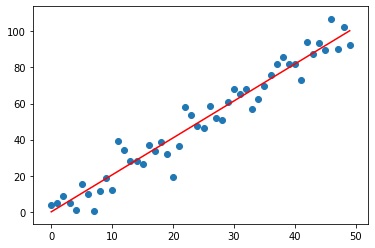

In [217]:
plt.plot(X, model(X,y)[2], color = 'red')
plt.scatter(X, y)
plt.show()

## Step 5: Make a prediction

In [218]:
def model_prediction(X_input):
    yhat = X_input * model(X,y)[0] + model(X,y)[1]
    print(yhat)

In [219]:
model_prediction(53)

108.48988978027604
